# Amazon Product Reviews of iPhone 11(64gb)

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [9]:
# Load data sets
reviews = pd.read_csv("iphone11r.csv")
reviews

,Unnamed: 0,text
0,NaN,Samsung s10 is much better than iphone 11
1,NaN,hi I had purchased this phone in first week of...
2,NaN,I found this black spot while doing set up. Gi...
3,NaN,Please do not buy expensive product like iphon...
4,NaN,Dont go by the negative reviews! If you want t...
...,...,...
65,NaN,This I phone11 model {black} looks like Chines...
66,NaN,I have received this product with defective sp...
67,NaN,The iphone 11 is a good phone every thing is f...
68,NaN,"From the last 3 months, i was waiting for the ..."


In [10]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head()

,text
0,Samsung s10 is much better than iphone 11
1,hi I had purchased this phone in first week of...
2,I found this black spot while doing set up. Gi...
3,Please do not buy expensive product like iphon...
4,Dont go by the negative reviews! If you want t...


# Text Preprocessing

In [11]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [12]:
reviews['text'] = reviews.text.apply(clean)
reviews.text

0                  samsung  is much better than iphone 
1     hi i had purchased this phone in first week of...
2     i found this black spot while doing set up giv...
3     please do not buy expensive product like iphon...
4     dont go by the negative reviews if you want to...
                            ...                        
65    this i  model black looks like chinese phonei ...
66    i have received this product with defective sp...
67    the iphone  is a good phone every thing is fin...
68    from the last  months i was waiting for the be...
69    do not purchase iphone from amazon i purchased...
Name: text, Length: 70, dtype: object

In [13]:
reviews = [text.strip() for text in reviews.text] # remove both the leading and the trailing characters
reviews = [text for text in reviews if text] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['samsung  is much better than iphone',
 'hi i had purchased this phone in first week of june  trusting amazon but this phone is defective it failed to update failed to connect to servers finding no other solution i used old version of ios hoping it will work fine but it is not working fine everytime it hangs and i am not able to work today while putting it for charging there was a blast in the battery and since then it is not working i have just exceeded return period perhaps my  thousand is now gone down the drain',
 'i found this black spot while doing set up given me defective piece  now not able to give for replacement also its a very next day of purchase',
 'please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger doesnt come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that th

In [14]:
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
len(reviews_text)

38941

In [15]:
print(reviews_text)

samsung  is much better than iphone hi i had purchased this phone in first week of june  trusting amazon but this phone is defective it failed to update failed to connect to servers finding no other solution i used old version of ios hoping it will work fine but it is not working fine everytime it hangs and i am not able to work today while putting it for charging there was a blast in the battery and since then it is not working i have just exceeded return period perhaps my  thousand is now gone down the drain i found this black spot while doing set up given me defective piece  now not able to give for replacement also its a very next day of purchase please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger doesnt come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that they dont take r

In [16]:
# Tokenization
from nltk.tokenize import word_tokenize
reviews_tokens = word_tokenize(reviews_text)
print(reviews_tokens)

['samsung', 'is', 'much', 'better', 'than', 'iphone', 'hi', 'i', 'had', 'purchased', 'this', 'phone', 'in', 'first', 'week', 'of', 'june', 'trusting', 'amazon', 'but', 'this', 'phone', 'is', 'defective', 'it', 'failed', 'to', 'update', 'failed', 'to', 'connect', 'to', 'servers', 'finding', 'no', 'other', 'solution', 'i', 'used', 'old', 'version', 'of', 'ios', 'hoping', 'it', 'will', 'work', 'fine', 'but', 'it', 'is', 'not', 'working', 'fine', 'everytime', 'it', 'hangs', 'and', 'i', 'am', 'not', 'able', 'to', 'work', 'today', 'while', 'putting', 'it', 'for', 'charging', 'there', 'was', 'a', 'blast', 'in', 'the', 'battery', 'and', 'since', 'then', 'it', 'is', 'not', 'working', 'i', 'have', 'just', 'exceeded', 'return', 'period', 'perhaps', 'my', 'thousand', 'is', 'now', 'gone', 'down', 'the', 'drain', 'i', 'found', 'this', 'black', 'spot', 'while', 'doing', 'set', 'up', 'given', 'me', 'defective', 'piece', 'now', 'not', 'able', 'to', 'give', 'for', 'replacement', 'also', 'its', 'a', 'ver

In [17]:
len(reviews_tokens) 

7220

In [18]:
# Stopwords
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in reviews_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['samsung', 'much', 'better', 'iphone', 'hi', 'purchased', 'phone', 'first', 'week', 'june', 'trusting', 'amazon', 'phone', 'defective', 'failed', 'update', 'failed', 'connect', 'servers', 'finding', 'solution', 'used', 'old', 'version', 'ios', 'hoping', 'work', 'fine', 'working', 'fine', 'everytime', 'hangs', 'able', 'work', 'today', 'putting', 'charging', 'blast', 'battery', 'since', 'working', 'exceeded', 'return', 'period', 'perhaps', 'thousand', 'gone', 'drain', 'found', 'black', 'spot', 'set', 'given', 'defective', 'piece', 'able', 'give', 'replacement', 'also', 'next', 'day', 'purchase', 'please', 'buy', 'expensive', 'product', 'like', 'iphone', 'amazon', 'bad', 'exp', 'charger', 'cord', 'missing', 'sound', 'quality', 'issues', 'amazon', 'initial', 'told', 'charger', 'doesnt', 'come', 'box', 'challenged', 'asked', 'reimburse', 'cord', 'amount', 'requested', 'replacement', 'days', 'called', 'informed', 'dont', 'take', 'responsibility', 'missing', 'items', 'day']


In [19]:
len(no_stop_tokens)

3866

In [20]:
# Noramalize the data
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['samsung', 'much', 'better', 'iphone', 'hi', 'purchased', 'phone', 'first', 'week', 'june', 'trusting', 'amazon', 'phone', 'defective', 'failed', 'update', 'failed', 'connect', 'servers', 'finding', 'solution', 'used', 'old', 'version', 'ios', 'hoping', 'work', 'fine', 'working', 'fine', 'everytime', 'hangs', 'able', 'work', 'today', 'putting', 'charging', 'blast', 'battery', 'since', 'working', 'exceeded', 'return', 'period', 'perhaps', 'thousand', 'gone', 'drain', 'found', 'black']


In [21]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

In [22]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:40])

samsung much better iphone hi purchased phone first week june trusting amazon phone defective failed update failed connect servers finding solution used old version ios hoping work fine working fine everytime hangs able work today putting charging blast battery since


In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['samsung', 'much', 'well', 'iphone', 'hi', 'purchase', 'phone', 'first', 'week', 'june', 'trust', 'amazon', 'phone', 'defective', 'fail', 'update', 'fail', 'connect', 'server', 'find', 'solution', 'use', 'old', 'version', 'io', 'hope', 'work', 'fine', 'work', 'fine', 'everytime', 'hang', 'able', 'work', 'today', 'put', 'charge', 'blast', 'battery', 'since']


# Feature Extaction
## Using CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [25]:
print(cv.get_feature_names()[100:200])

['bluetooth', 'boughtstarte', 'box', 'brand', 'breaker', 'bright', 'browse', 'btw', 'budget', 'bug', 'build', 'bulky', 'buttery', 'button', 'buy', 'buybut', 'buyer', 'buying', 'cable', 'call', 'camera', 'can', 'capacity', 'capture', 'card', 'care', 'careful', 'case', 'casual', 'center', 'centre', 'certain', 'certainly', 'challenge', 'chance', 'change', 'charge', 'charger', 'charging', 'charm', 'cheap', 'cheated', 'check', 'chinese', 'chip', 'chipset', 'choice', 'chore', 'circumstance', 'citizen', 'claim', 'clarity', 'clear', 'click', 'close', 'cloth', 'cloud', 'clue', 'co', 'colleague', 'color', 'colour', 'come', 'comment', 'common', 'company', 'compare', 'comparison', 'compete', 'complaint', 'complete', 'completely', 'complex', 'compromise', 'con', 'conclusion', 'condition', 'conference', 'confirm', 'confuse', 'connect', 'connection', 'connectivity', 'connector', 'contact', 'contain', 'continuously', 'contrast', 'conversation', 'copy', 'cord', 'corona', 'correct', 'cost', 'could', 'co

C:\Users\elcot\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(tweetscv.toarray().shape)

(3952, 1164)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [29]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'android', 'app', 'apple', 'ask', 'back', 'bad', 'battery', 'buy', 'call', 'camera', 'care', 'charge', 'charger', 'come', 'compare', 'con', 'customer', 'day', 'defective', 'device', 'display', 'do', 'even', 'everything', 'exchange', 'experience', 'face', 'feel', 'first', 'get', 'give', 'go', 'good', 'got', 'great', 'guy', 'heating', 'io', 'iphone', 'issue', 'know', 'last', 'lcd', 'life', 'like', 'look', 'lot', 'make', 'month', 'much', 'need', 'never', 'new', 'not', 'one', 'order', 'people', 'phone', 'please', 'premium', 'price', 'pro', 'problem', 'product', 'provide', 'purchase', 'put', 'quality', 'really', 'receive', 'replacement', 'return', 'review', 'say', 'screen', 'see', 'seller', 'service', 'since', 'sound', 'store', 'suggest', 'switch', 'take', 'thing', 'think', 'time', 'touch', 'try', 'update', 'use', 'user', 'video', 'want', 'well', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

# TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [31]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['able', 'absolutely', 'agent', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'amount', 'android', 'another', 'anything', 'app', 'appario', 'appeal', 'apple', 'artificial', 'asap', 'ask', 'attach', 'authentication', 'avg', 'away', 'awesome', 'back', 'bad', 'bangalore', 'banking', 'base', 'battery', 'be', 'beautiful', 'bit', 'black', 'bluetooth', 'box', 'brand', 'bright', 'browse', 'budget', 'bug', 'build', 'button', 'buy', 'call', 'camera', 'can', 'card', 'care', 'careful', 'case', 'center', 'centre', 'chance', 'charge', 'charger', 'check', 'claim', 'close', 'color', 'come', 'common', 'compare', 'comparison', 'compete', 'complaint', 'complete', 'completely', 'complex', 'con', 'condition', 'connection', 'connector', 'contact', 'cord', 'cost', 'could', 'couple', 'customer', 'daily', 'damage', 'datum', 'day', 'deal', 'decision', 'defect', 'defective', 'definitely', 'deliver', 'delivery', 'deny', 'design', 'device', 'difference', 'digit', 'dint', 'discount', 'display', 'do', 

In [32]:
clean_reviews=' '.join(lemmas)
clean_reviews

'samsung much well iphone hi purchase phone first week june trust amazon phone defective fail update fail connect server find solution use old version io hope work fine work fine everytime hang able work today put charge blast battery since work exceed return period perhaps thousand go drain find black spot set give defective piece able give replacement also next day purchase please buy expensive product like iphone amazon bad exp charger cord miss sound quality issue amazon initial tell charger do not come box challenge ask reimburse cord amount request replacement day call informed do not take responsibility miss item day replacement policy do not follow read email conversation attach mention every thing call recording well last deny phone replacement even provide miss cord damage quality issue say amazon responsible do not go negative review want go iphone compete high end android phone one use oneplus month sell say comparison photo iphone take way well op battery perform really we

# Generate Word Cloud

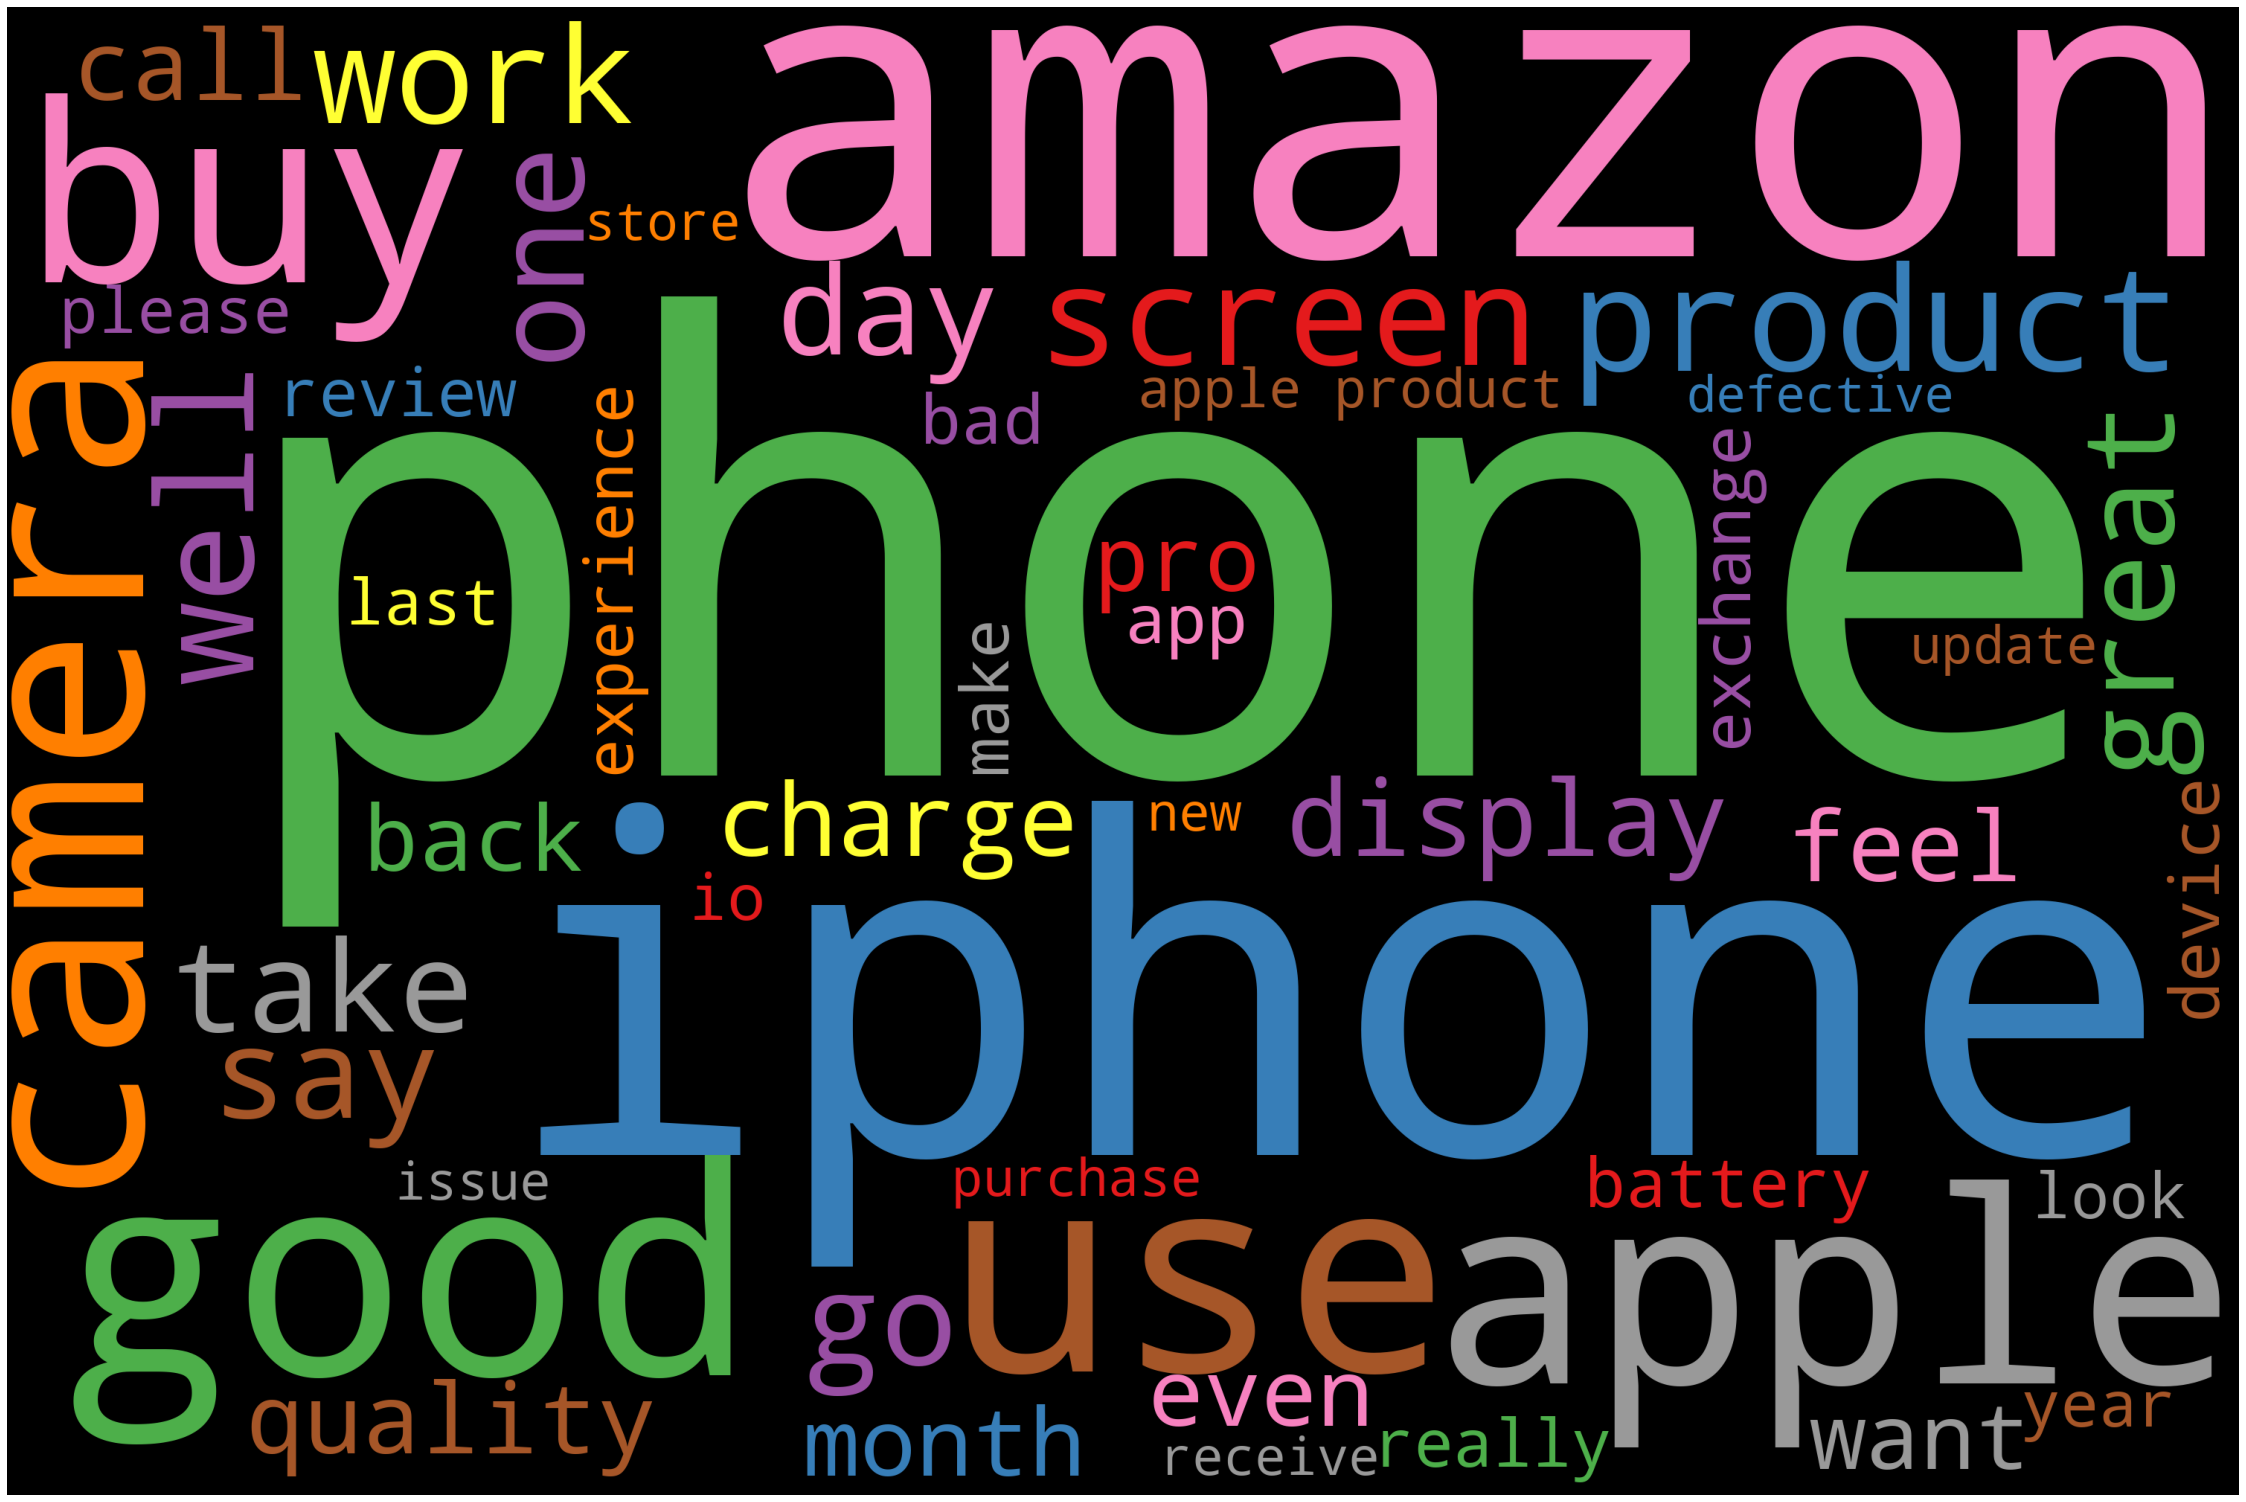

In [33]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [34]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [35]:
for token in doc_block[500:600]:
    print(token, token.pos_)

difference NOUN
correct ADJ
get VERB
media NOUN
app NOUN
like ADP
youtube NOUN
netflix NOUN
etc X
notice NOUN
difference NOUN
low ADJ
resolution NOUN
there PRON
s VERB
escape NOUN
fact NOUN
also ADV
notice VERB
great ADJ
difference NOUN
screenshot NOUN
contain NOUN
text NOUN
display NOUN
opinion NOUN
would AUX
main ADJ
deal NOUN
breaker NOUN
case NOUN
phone NOUN
mom NOUN
she PRON
s VERB
tech NOUN
geek NOUN
she PRON
s AUX
love VERB
purple ADJ
color NOUN
camera NOUN
phone NOUN
also ADV
you PRON
re VERB
datum PROPN
transfer NOUN
phone NOUN
laptop NOUN
phone NOUN
frustrate NOUN
sure ADV
suggest VERB
rely ADJ
cloud PROPN
base PROPN
service NOUN
manual ADJ
cable NOUN
sync NOUN
process NOUN
conclusion NOUN
personal PROPN
thought VERB
overall ADJ
phone NOUN
great ADJ
one NOUN
you PRON
re VERB
tech NOUN
geek PROPN
want VERB
late ADJ
iphone NOUN
also ADV
great ADJ
pick NOUN
want VERB
great ADJ
hardware NOUN
flagship NOUN
tech NOUN
prefer VERB
watch VERB
medium ADJ
laptop NOUN
smart ADJ
tv NOUN
w

In [36]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[500:600])

['screen', 'retina', 'display', 'term', 'lcd', 'screen', 'screen', 'resolution', 'activity', 'people', 'notice', 'screen', 'phone', 'shell', 'customer', 'deserve', 'hd', 'screen', 'today', 'budget', 'phone', 'come', 'screen', 'step', 'apple', 'appreciate', 'mention', 'prefer', 'screen', 'lcd', 'contrast', 'ratio', 'screen', 'iphone', 'ole', 'screen', 'compare', 'compare', 'resolution', 'note', 'series', 'oppo', 'screen', 'series', 'phone', 'iphone', 'battery', 'life', 'user', 'lot', 'video', 'stream', 'music', 'time', 'bluetooth', 'location', 'browse', 'call', 'video', 'conference', 'meeting', 'push', 'email', 'light', 'browse', 'site', 'lot', 'photosvideo', 'beast', 'survive', 'day', 'thing', 'take', 'h', 'charge', 'suggest', 'buy', 'watt', 'charger', 'sell', 'apple', 'provide', 'price', 'point', 'part', 'ecosystem', 'icloud', 'storage', 'require', 'want', 'phonephoto', 'cost', 'month', 'apple', 'pull', 'ecosystem', 'service', 'say', 'apple', 'ecosystem']


In [37]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,136
1,iphone,70
2,apple,51
3,buy,46
4,product,45
5,use,43
6,camera,34
7,amazon,33
8,screen,29
9,work,27


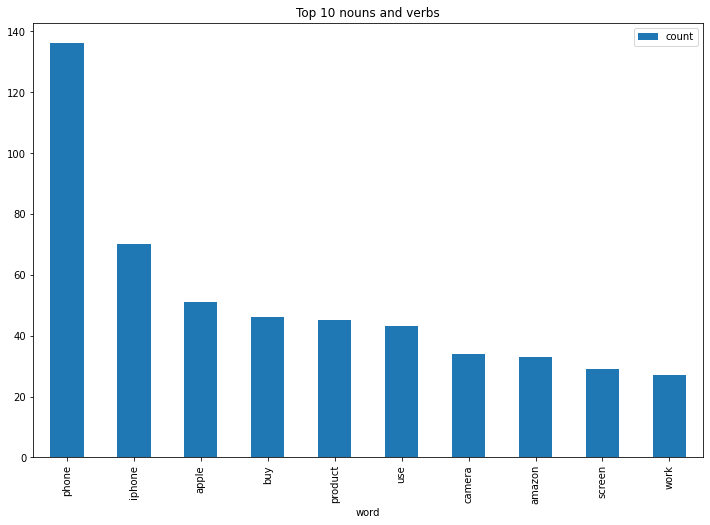

In [38]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [39]:
reviews = pd.read_csv("iPhone11r.csv")

In [40]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [41]:
reviews['text'] = reviews.text.apply(clean)

In [42]:
reviews = [text.strip() for text in reviews.text] 
reviews = [text for text in reviews if text] 
reviews

['samsung  is much better than iphone',
 'hi i had purchased this phone in first week of june  trusting amazon but this phone is defective it failed to update failed to connect to servers finding no other solution i used old version of ios hoping it will work fine but it is not working fine everytime it hangs and i am not able to work today while putting it for charging there was a blast in the battery and since then it is not working i have just exceeded return period perhaps my  thousand is now gone down the drain',
 'i found this black spot while doing set up given me defective piece  now not able to give for replacement also its a very next day of purchase',
 'please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger doesnt come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that th

In [43]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(reviews))
sentences

['samsung  is much better than iphone hi i had purchased this phone in first week of june  trusting amazon but this phone is defective it failed to update failed to connect to servers finding no other solution i used old version of ios hoping it will work fine but it is not working fine everytime it hangs and i am not able to work today while putting it for charging there was a blast in the battery and since then it is not working i have just exceeded return period perhaps my  thousand is now gone down the drain i found this black spot while doing set up given me defective piece  now not able to give for replacement also its a very next day of purchase please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger doesnt come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that they dont take

In [44]:
sent_df = pd.DataFrame(reviews,columns=['sentence'])
sent_df

,sentence
0,samsung is much better than iphone
1,hi i had purchased this phone in first week of...
2,i found this black spot while doing set up giv...
3,please do not buy expensive product like iphon...
4,dont go by the negative reviews if you want to...
...,...
65,this i model black looks like chinese phonei ...
66,i have received this product with defective sp...
67,the iphone is a good phone every thing is fin...
68,from the last months i was waiting for the be...


In [47]:
affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')

In [48]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [49]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [50]:
# manual testing
calculate_sentiment(text='great')

3

In [51]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      3
2      0
3    -10
4      5
      ..
65     2
66     1
67     4
68    48
69    -1
Name: sentiment_value, Length: 70, dtype: int64

In [52]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
51,hello please dont take any apple products onli...,-12
23,the media could not be loaded i received the p...,-10
3,please do not buy expensive product like iphon...,-10
7,beware of amazon and the seller appario retail...,-10
36,worst phone and worst servicei bought from ama...,-8
...,...,...
52,in my opinion dont think much about the phone ...,30
47,pros excellent phone with sleek screen exce...,33
15,been almost months i have been using the ipho...,39
10,my mom got this phone after using oneplus for...,43


In [53]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    70.000000
mean      5.042857
std      12.334041
min     -12.000000
25%      -1.000000
50%       1.500000
75%       5.750000
max      48.000000
Name: sentiment_value, dtype: float64

In [54]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,samsung is much better than iphone,0
2,i found this black spot while doing set up giv...,0
3,please do not buy expensive product like iphon...,-10
6,the worst phn i have boughtstarted to heat up ...,-6
7,beware of amazon and the seller appario retail...,-10
8,pathetic amazon service dont buy online my bac...,-1
9,after years with iphone i finally decided to...,0
12,i ordered on january already i am having thr...,-6
18,my phone is producing too much heat even didnt...,-2
21,received faulty phone dont buy here buy from s...,-4


In [55]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value
1,hi i had purchased this phone in first week of...,3
4,dont go by the negative reviews if you want to...,5
5,awesome phone nice upgrade from iphone to iph...,13
10,my mom got this phone after using oneplus for...,43
11,i want to return the product because it looks ...,2
13,i am having mike n speaker issue n due to lock...,4
14,the product i got was defective the face id i...,3
15,been almost months i have been using the ipho...,39
16,never go for amazon if its i phone had some is...,9
17,this being my second apple device no i havent ...,28


In [56]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,samsung is much better than iphone,0,0
1,hi i had purchased this phone in first week of...,3,1
2,i found this black spot while doing set up giv...,0,2
3,please do not buy expensive product like iphon...,-10,3
4,dont go by the negative reviews if you want to...,5,4
...,...,...,...
65,this i model black looks like chinese phonei ...,2,65
66,i have received this product with defective sp...,1,66
67,the iphone is a good phone every thing is fin...,4,67
68,from the last months i was waiting for the be...,48,68


C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

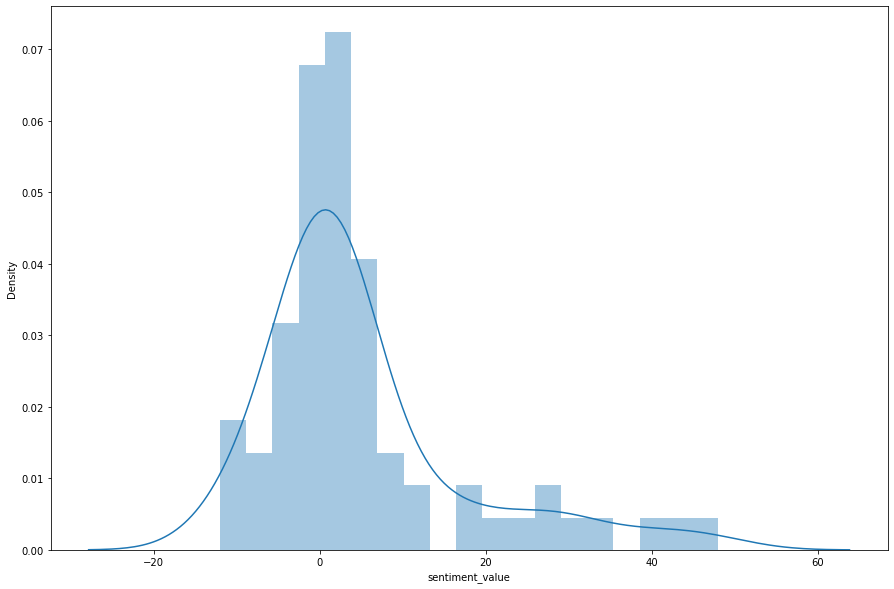

In [57]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

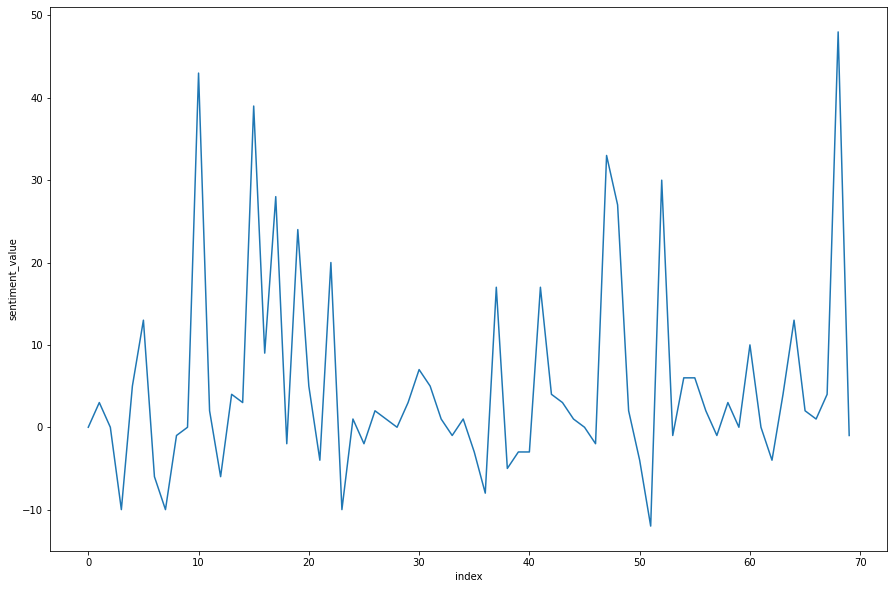

In [58]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)